In [6]:
import pandas as pd
# INPUTS ###
# Lista de vértices
V = ['u','a','b','c','d']

# Lista de aristas 
E = [('u','a'),('a','b'),('a','d'),('d','a'),('d','u')
     ,('d','c'),('c','b'),('b','c'),('a','c'),('u','b'),('b','u')]

# Pesos de las aristas
P = {('u','a'):5,('a','b'):2,('a','d'):3,('d','a'):2,('d','u'):10,
     ('d','c'):1,('c','b'):4,('b','c'):6,('a','c'):9,('u','b'):7,('b','u'):7}

##### Otro ejemplo #####

#V = ["s","c","b","e","d","t"]

#E = [("s","b"),("s","c"),('b','c'),('c','d'),('b','d'),('c','e'),('d','e'),('d','t'),('e','t'),
 #    ('b','s'),('c','s'),('c','b'),('d','c'),('d','b'),('e','c'),('e','d'),('t','d'),('t','e')]

#P = {("s","b"):4,("s","c"):2,('b','c'):1,('c','d'):8,('b','d'):5,('c','e'):10,('d','e'):2,('d','t'):6,('e','t'):2,
 #    ('b','s'):4,('c','s'):2,('c','b'):1,('d','c'):8,('d','b'):5,('e','c'):10,('e','d'):2,('t','d'):6,('t','e'):2}

########################


###########

# Cantidad de vertices
n = len(V)

# CAMBIAR VERTICE INICIAL
# Vértice inicial
v_0 = 'u' 
S = {v_0}

# S complemento
S_c = set(V)-S
# Contador
i = 0

# Generamos las primeras etiquetas:
# (0,-) Para el vértice inicial
# (inf,-) Para el resto, (- == -1)
inf = float('inf')
L = {v_0:[0,-1]}
for v in V:
    if v != v_0:
        L[v] = [inf,-1]

L 
print(L)

# Inicialización    
while i < n-1:
     #print(f"Iteración: {i+1}")
     for s in S_c:
          # Guardo el valor original
          original = L[s][0]
          lista = [L[s][0]]
          for v in S:
          # Genera la Lista ############
               if (v,s) in E: 
                    lista.append(L[v][0] + P[(v,s)])  
               else:
                    lista.append(L[v][0] + inf)
          ##############################   
          L[s][0] = min(lista)
          # Para cambiar por el vértice donde se encontro el mínimo
          if min(lista) != original:
               l_aux = [L[v][1]]
               l_aux = l_aux + list(S)
               indice_min = min(enumerate(lista), key=lambda x: x[1])[0]
               L[s][1] = l_aux[indice_min]
          #print(f"L({s}) = min{lista}")
     
     # --- Unión de Nuevo Vértice y S ---
     # Se crea una lista con las etiquetas de los vertices de S_c
     valores_filtrados = [L[k] for k in S_c]
     minimo = min(valores_filtrados, key=lambda x: x[0])
     for clave,valor in L.items():
          if valor == minimo:
               new_vertice = clave
     S.add(new_vertice)
     S_c = set(V)-S
     # ----------------------------------
     i = i + 1

# Output: 
     # Tabla que contiene el camino mas corto desde u a cada vértice
     

tabla = {
    "Vértice": list(L.keys()),
    "Distancia": [v[0] for v in L.values()]
}

df = pd.DataFrame(tabla)
print(df)
L





{'u': [0, -1], 'a': [inf, -1], 'b': [inf, -1], 'c': [inf, -1], 'd': [inf, -1]}
  Vértice  Distancia
0       u          0
1       a          5
2       b          7
3       c          9
4       d          8


{'u': [0, -1], 'a': [5, 'u'], 'b': [7, 'u'], 'c': [9, 'd'], 'd': [8, 'a']}

In [ ]:
# Codigo de Dijkstra ya implementado en python
# Solo con el fin de comparar resultados
import networkx as nx

# Lista de vértices
V1 = ['u', 'a', 'b', 'c', 'd']

# Lista de aristas
E1 = [('u', 'a'), ('a', 'b'), ('a', 'd'), ('d', 'a'), ('d', 'u'),
      ('d', 'c'), ('c', 'b'), ('b', 'c'), ('a', 'c'), ('u', 'b'), ('b', 'u')]

# Pesos de las aristas
P1 = {
    ('u', 'a'): 5, ('a', 'b'): 2, ('a', 'd'): 3, ('d', 'a'): 2, ('d', 'u'): 10,
    ('d', 'c'): 1, ('c', 'b'): 4, ('b', 'c'): 6, ('a', 'c'): 9, ('u', 'b'): 7, ('b', 'u'): 7
}

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir aristas con peso
for (u, v) in E1:
    G.add_edge(u, v, weight=P1[(u, v)])

# Ejecutar Dijkstra desde el nodo 'u'
distancias = nx.single_source_dijkstra_path_length(G, source='u')
caminos = nx.single_source_dijkstra_path(G, source='u')

# Mostrar resultados
print("Distancias mínimas desde 'u':")
for nodo in distancias:
    print(f"{nodo}: {distancias[nodo]}")

print("\nCaminos más cortos desde 'u':")
for nodo in caminos:
    print(f"{nodo}: {caminos[nodo]}")



Distancias mínimas desde 'u':
u: 0
a: 5
b: 7
d: 8
c: 9

Caminos más cortos desde 'u':
u: ['u']
a: ['u', 'a']
b: ['u', 'b']
d: ['u', 'a', 'd']
c: ['u', 'a', 'd', 'c']


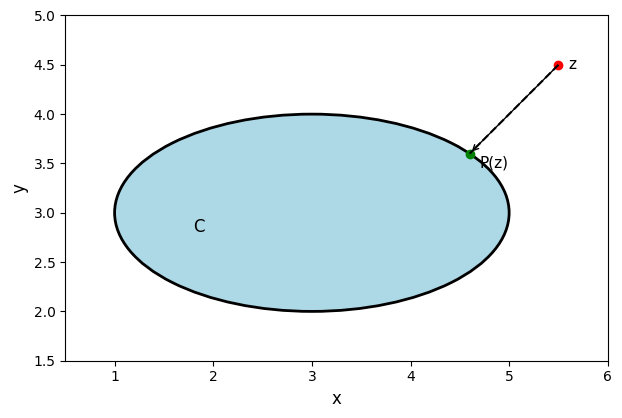

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(7, 7))

# Dibujar una elipse como conjunto convexo
ellipse = Ellipse((3, 3), width=4, height=2, edgecolor='black', facecolor='lightblue', lw=2)
ax.add_patch(ellipse)

# Punto exterior
x_ext = np.array([5.5, 4.5])
ax.plot(*x_ext, 'ro', label='z')
ax.text(x_ext[0] + 0.1, x_ext[1], 'z', fontsize=11, va='center')

# Proyección ortogonal (calculada manualmente aquí para representar un punto sobre la elipse)
x_proj = np.array([4.6, 3.6])
ax.plot(*x_proj, 'go', label='P(z)')
ax.text(x_proj[0] + 0.1, x_proj[1] - 0.1, 'P(z)', fontsize=11, va='center')

# Línea que une el punto exterior con su proyección
ax.plot([x_ext[0], x_proj[0]], [x_ext[1], x_proj[1]], 'k--', lw=1.5)
ax.annotate('', xy=x_proj, xytext=x_ext, arrowprops=dict(arrowstyle='->', color='black'))

# Etiqueta para el conjunto convexo
ax.text(1.8, 2.8, 'C ', fontsize=12, color='black')

# Ajustes de los ejes
ax.set_xlim(0.5, 6)
ax.set_ylim(1.5, 5)
ax.set_aspect('equal')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.grid(False)

plt.show()
